# Load Dependencies

Loading required python packages.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#models
from sklearn.linear_model import LogisticRegression

#metrics, procssing and model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Data Collection

As kaggle already provided us with data in the form of csv files, all we have to do is load them into dataframes.

In [3]:
#loading csv's
train=pd.read_csv('train.csv')
test=pd.read_csv('test_with_no_labels.csv')

In [5]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [13]:
train.shape

(15819, 3)

In [12]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [17]:
test.shape

(10546, 2)

# Data Cleaning

Kaggle tries to provide us with clean data but it's always a good idea to check for ourselves. We check for null and empty values.

In [18]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [66]:
i=0
for x in train.columns:
    if '' in sorted(train[x].unique()):
        i+=1
print('The data contains '+str(i)+' empty values over all columns')

The data contains 0 empty values over all columns


none of our columns contain any null or empty values.

# Exploratory Data Analysis

In [67]:
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [68]:
#Evaluating the skewness
train.skew()

sentiment   -0.683959
tweetid     -0.008471
dtype: float64

In [69]:
#Evaluating the kurtosis
train.kurtosis()

sentiment    0.122976
tweetid     -1.193356
dtype: float64

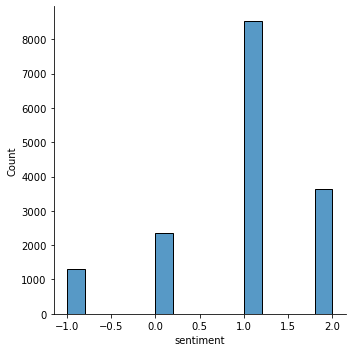

In [72]:
sns.displot(train['sentiment'])

<AxesSubplot:xlabel='sentiment', ylabel='count'>

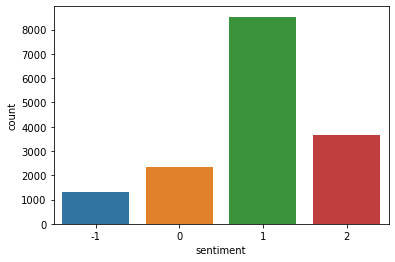

In [127]:
sns.countplot(x=train['sentiment'])

<b>Analysising messages to determine which talk about climate change</b>

We can see there are a total of 15819 messages

In [203]:
df = pd.DataFrame(train['message'])
df.count()

message    15819
dtype: int64

Of those messages 12587 contain the word 'climate' in them

In [204]:
df.loc[train['message'].str.contains("climate")].count()

message    12587
dtype: int64

Of those messages 12547 contain the word 'change' in them

In [205]:
df.loc[train['message'].str.contains("change")].count()

message    12547
dtype: int64

Of those messages 12471 contain the words 'climate change' in them

In [202]:
df.loc[train['message'].str.contains("climate change")].count()

message    12471
dtype: int64

# Pre-Processing

Splitting the data into features and labels

In [22]:
# labels
y = train['sentiment']

# features
X = train.drop('sentiment', axis=1)

In [25]:
# Transforming the Features
X_transformed = pd.get_dummies(X, drop_first=True)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=50)

## Training

Using Logistical Regression

In [34]:
lr = LogisticRegression()

In [35]:
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
lr.intercept_[0]

-7.58553490570881e-12

In [63]:
coeff_df = pd.DataFrame(lr.coef_.T, X_transformed.columns)
coeff_df

,0,1,2,3
tweetid,-1.439056e-06,-4.059810e-07,1.560269e-06,2.847680e-07
message_ yea your nudes are nice but what are your views on climate change' i just choked why is this me 😂,-2.639825e-15,9.105447e-15,-3.425326e-15,-3.040296e-15
message_!! climate change should not be a partisan issue !!,-1.751204e-15,-2.363569e-15,7.119133e-15,-3.004361e-15
message_#24hwatchparty #SimonDonner Climate Scientist From UBC giving us the history of climate change https://t.co/lJvfLHw5s4,-7.222243e-16,-1.316970e-15,-7.616601e-15,9.655795e-15
"message_#3Novices : G-20 fails to agree on free trade and protectionism — climate change is missing, too https://t.co/azw6Gl68A4 The world's finan…",-1.839316e-15,-2.424703e-15,7.285704e-15,-3.021685e-15
...,...,...,...,...
message_�� Most Americans want 'aggressive' action on climate change: Reuters/Ipsos poll https://t.co/zV8j28UcFh https://t.co/414CgDAI1F,-1.149255e-15,-1.847002e-15,-6.215410e-15,9.211667e-15
"message_�� namikawas: weavemama: maybe gangster whales is what we need in order to fight climate change Whales,... https://t.co/Np8OJBY52v",-9.084878e-16,1.039082e-14,-6.935312e-15,-2.547021e-15
message_����will continue to lead in climate change &amp; working together with ���� https://t.co/rlFokndFMX,-1.127147e-15,-1.823899e-15,5.687803e-15,-2.736758e-15
message_📢 #ClimateChange \nPeople prepare to fight their governments on climate change https://t.co/rcJ9VoUL7T\n#KRTpro #News,-1.085673e-15,-1.779542e-15,-6.392369e-15,9.257584e-15
